In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_pickle('player_2016_2018.pkl')

In [3]:
data['DK_SAL'] = pd.to_numeric(data['DK_SAL'])
data['VALUE'] = pd.to_numeric(data['VALUE'])
data['FAVORITE'] = data['FAVORITE'].astype(int)
data['SPREAD_10+'] = data['SPREAD_10+'].astype(int)

In [4]:
data.columns

Index(['DATE', 'PLAYER', 'POSITION', 'TEAM', 'OPPONENT', 'ROAD_HOME',
       'MINUTES', 'DraftKings_PTS', 'USAGE', 'DK_SAL', 'MINUTES_roll3',
       'MINUTES_roll5', 'MINUTES_roll10', 'MINUTES_roll25',
       'DraftKings_PTS_roll3', 'DraftKings_PTS_roll5', 'DraftKings_PTS_roll10',
       'DraftKings_PTS_roll25', 'USAGE_roll3', 'USAGE_roll5', 'USAGE_roll10',
       'USAGE_roll25', 'PACE', 'OEFF', 'DEFF', 'REST DAYS', 'OPENING TOTAL',
       'FAVORITE', 'SPREAD_10+', 'C_DK_PTS', 'PF_DK_PTS', 'PG_DK_PTS',
       'SF_DK_PTS', 'SG_DK_PTS', 'opp_C_allowed', 'opp_PF_allowed',
       'opp_PG_allowed', 'opp_SF_allowed', 'opp_SG_allowed', 'PACE_roll3',
       'PACE_roll5', 'PACE_roll10', 'PACE_roll25', 'OEFF_roll3', 'OEFF_roll5',
       'OEFF_roll10', 'OEFF_roll25', 'DEFF_roll3', 'DEFF_roll5', 'DEFF_roll10',
       'DEFF_roll25', 'opp_C_allowed_roll3', 'opp_C_allowed_roll5',
       'opp_C_allowed_roll10', 'opp_C_allowed_roll25', 'opp_PF_allowed_roll3',
       'opp_PF_allowed_roll5', 'opp_PF_allo

In [9]:
cols = ['POSITION','MINUTES','MINUTES_roll3',
       'MINUTES_roll5', 'MINUTES_roll10', 'MINUTES_roll25','DraftKings_PTS_roll3', 'DraftKings_PTS_roll5', 'DraftKings_PTS_roll10',
       'DraftKings_PTS_roll25', 'USAGE_roll3', 'USAGE_roll5', 'USAGE_roll10',
       'USAGE_roll25','PACE_roll3',
       'PACE_roll5', 'PACE_roll10', 'PACE_roll25', 'OEFF_roll3', 'OEFF_roll5',
       'OEFF_roll10', 'OEFF_roll25', 'DEFF_roll3', 'DEFF_roll5', 'DEFF_roll10',
       'DEFF_roll25', 'opp_C_allowed_roll3', 'opp_C_allowed_roll5',
       'opp_C_allowed_roll10', 'opp_C_allowed_roll25', 'opp_PF_allowed_roll3',
       'opp_PF_allowed_roll5', 'opp_PF_allowed_roll10',
       'opp_PF_allowed_roll25', 'opp_PG_allowed_roll3', 'opp_PG_allowed_roll5',
       'opp_PG_allowed_roll10', 'opp_PG_allowed_roll25',
       'opp_SF_allowed_roll3', 'opp_SF_allowed_roll5', 'opp_SF_allowed_roll10',
       'opp_SF_allowed_roll25', 'opp_SG_allowed_roll3', 'opp_SG_allowed_roll5',
       'opp_SG_allowed_roll10', 'opp_SG_allowed_roll25', 'opp_PACE_roll3',
       'opp_PACE_roll5', 'opp_PACE_roll10', 'opp_PACE_roll25', 'opp_OEFF_roll3',
       'opp_OEFF_roll5', 'opp_OEFF_roll10', 'opp_OEFF_roll25', 'opp_DEFF_roll3',
       'opp_DEFF_roll5', 'opp_DEFF_roll10', 'opp_DEFF_roll25', 'Start']

In [10]:
minutes = pd.DataFrame(data[cols])

In [11]:
minutes = pd.get_dummies(minutes)
minutes = minutes.dropna()

In [12]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [13]:
X_train, X_test = train_test_split(minutes, test_size=0.2,shuffle=False)



In [14]:
y_train = X_train.pop('MINUTES')
y_test = X_test.pop('MINUTES')

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [17]:
forest = RandomForestRegressor(oob_score=True, n_jobs=-1)
gradient = GradientBoostingRegressor()
LinReg = LinearRegression(n_jobs=-1)
LogReg = LogisticRegression(n_jobs=-1)

In [18]:
forest.fit(X_train_scaled,y_train)
gradient.fit(X_train_scaled,y_train)
LinReg.fit(X_train_scaled,y_train)
# LogReg.fit(X_train_scaled,y_train)

/Users/willhall/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [19]:
y_oob = forest.oob_prediction_
y_oob_gradient = gradient.predict(X_train_scaled)
y_oob_LinReg = LinReg.predict(X_train_scaled)

In [20]:
from sklearn.metrics import mean_absolute_error
print('Forest: ', mean_absolute_error(y_train,y_oob))
print('Gradient: ', mean_absolute_error(y_train,y_oob_gradient))
print('LinReg: ', mean_absolute_error(y_train,y_oob_LinReg))

Forest:  5.54749643585
Gradient:  4.61133723261
LinReg:  4.71909438116


In [38]:
from sklearn.metrics import mean_squared_error
print('Forest: ', mean_squared_error(y_train,y_oob))
print('Gradient: ', mean_squared_error(y_train,y_oob_gradient))
print('LinReg: ', mean_squared_error(y_train,y_oob_LinReg))

Forest:  53.8724757039
Gradient:  34.7462533505
LinReg:  36.4947941536


In [39]:
print('Forest: ', np.sqrt(mean_squared_error(y_train,y_oob)))
print('Gradient: ', np.sqrt(mean_squared_error(y_train,y_oob_gradient)))
print('LinReg: ', np.sqrt(mean_squared_error(y_train,y_oob_LinReg)))

Forest:  7.3397871702
Gradient:  5.89459526604
LinReg:  6.04109213252


MINUTES_roll2            0.020543
MINUTES_roll3            0.036728
MINUTES_roll5            0.376683
MINUTES_roll10           0.226462
DraftKings_PTS_roll2     0.006631
DraftKings_PTS_roll3     0.006186
DraftKings_PTS_roll5     0.006564
DraftKings_PTS_roll10    0.007700
USAGE_roll2              0.006329
USAGE_roll3              0.006238
USAGE_roll5              0.005611
USAGE_roll10             0.007326
PACE_roll2               0.005446
PACE_roll3               0.004898
PACE_roll5               0.005127
PACE_roll10              0.005422
OEFF_roll2               0.005261
OEFF_roll3               0.005035
OEFF_roll5               0.005120
OEFF_roll10              0.005643
DEFF_roll2               0.005647
DEFF_roll3               0.005618
DEFF_roll5               0.005439
DEFF_roll10              0.005719
opp_C_allowed_roll3      0.005529
opp_C_allowed_roll5      0.005419
opp_C_allowed_roll10     0.005359
opp_C_allowed_roll25     0.005814
opp_PF_allowed_roll3     0.005889
opp_PF_allowed

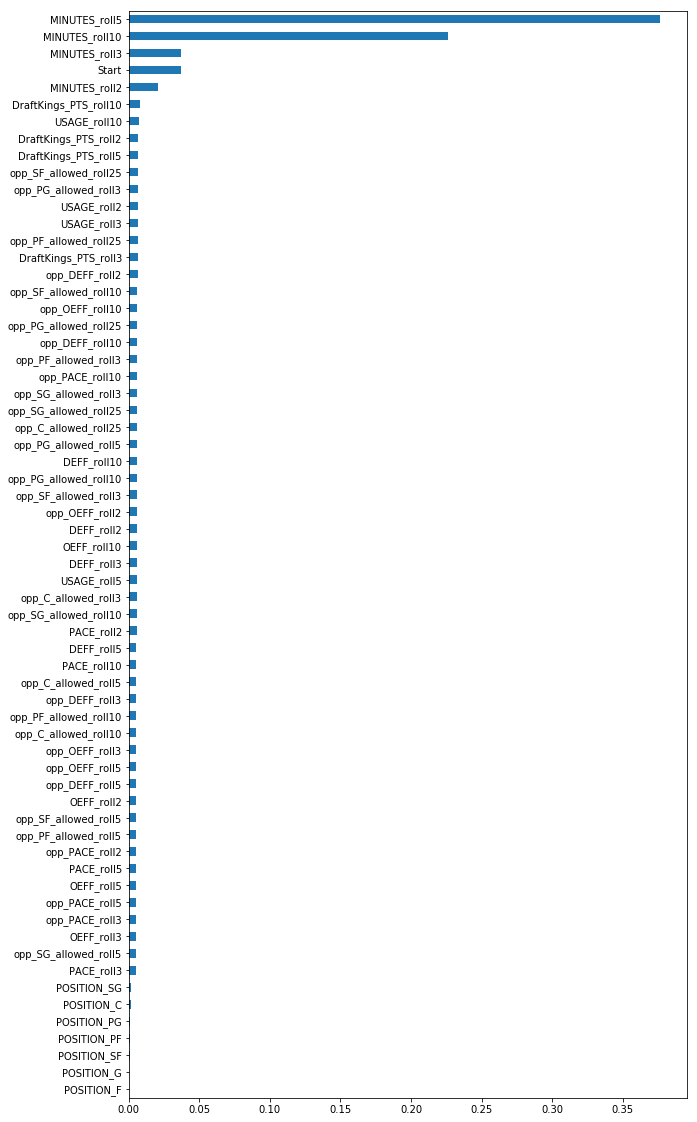

In [40]:
#from ipykernel import kernelapp as app

feature_importances_forest = pd.Series(forest.feature_importances_, index=X_train.columns)
print(feature_importances_forest)
feature_importances_forest.sort_values(inplace=True)
feature_importances_forest.plot(kind='barh', figsize=(10,20))

MINUTES_roll2            0.090781
MINUTES_roll3            0.063494
MINUTES_roll5            0.033733
MINUTES_roll10           0.103156
DraftKings_PTS_roll2     0.044821
DraftKings_PTS_roll3     0.018437
DraftKings_PTS_roll5     0.004397
DraftKings_PTS_roll10    0.021456
USAGE_roll2              0.011676
USAGE_roll3              0.010045
USAGE_roll5              0.030001
USAGE_roll10             0.037259
PACE_roll2               0.005058
PACE_roll3               0.013975
PACE_roll5               0.007421
PACE_roll10              0.024061
OEFF_roll2               0.011296
OEFF_roll3               0.007770
OEFF_roll5               0.006792
OEFF_roll10              0.015396
DEFF_roll2               0.015372
DEFF_roll3               0.005855
DEFF_roll5               0.009517
DEFF_roll10              0.016721
opp_C_allowed_roll3      0.006178
opp_C_allowed_roll5      0.016366
opp_C_allowed_roll10     0.002056
opp_C_allowed_roll25     0.005230
opp_PF_allowed_roll3     0.013593
opp_PF_allowed

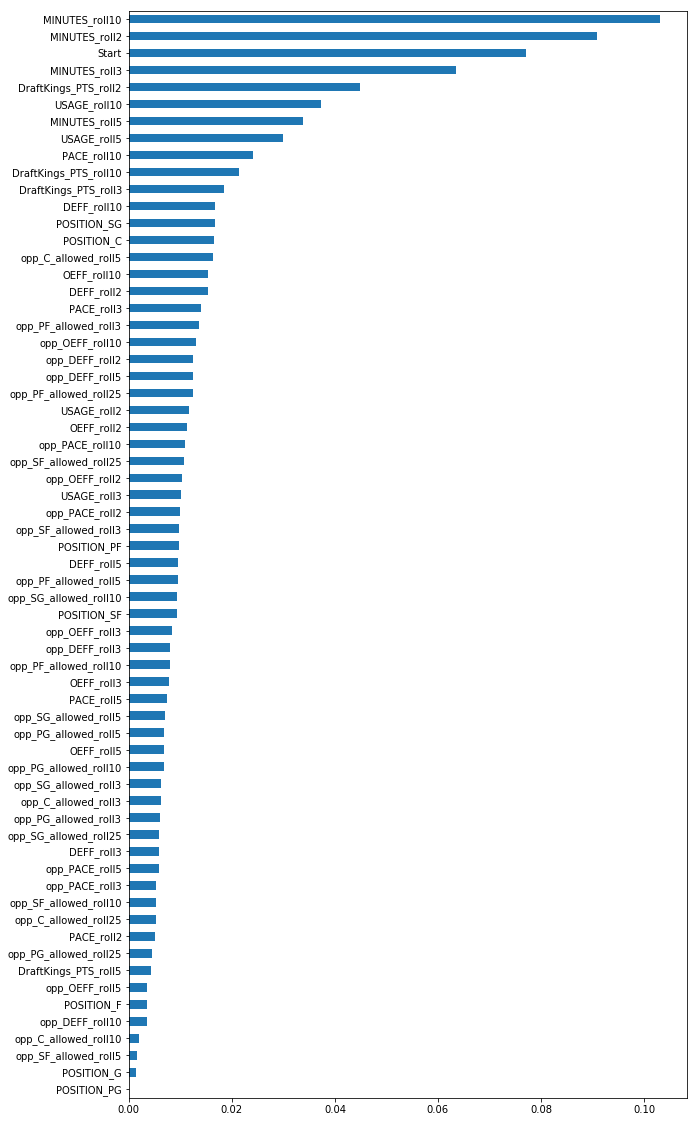

In [41]:
feature_importances_gradient = pd.Series(gradient.feature_importances_, index=X_train.columns)
print(feature_importances_gradient)
feature_importances_gradient.sort_values(inplace=True)
feature_importances_gradient.plot(kind='barh', figsize=(10,20))